In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as sp


In [129]:
path = "C:\\Users\\butym\\Downloads\\testing data.csv"
df=pd.read_csv(path)

In [130]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,NETHERLAND
2,5/2/2014 0:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,UK
3,5/2/2014 0:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,PAK
4,5/2/2014 0:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/5/2014 0:00,1090000,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA
108,5/5/2014 0:00,400000,2,1.00,840,5510,1.0,0,0,3,840,0,1955,2005,4515 SW Trenton St,Seattle,WA 98136,USA
109,5/5/2014 0:00,220000,4,1.50,1240,9600,1.0,0,0,3,1240,0,1971,0,4924 SW 314th Pl,Federal Way,WA 98023,USA
110,5/5/2014 0:00,657100,4,1.00,1390,4240,1.0,0,0,3,1050,340,1924,2011,4312 Woodlawn Ave N,Seattle,WA 98103,USA


In [131]:
df.head() #return top 5 rows of data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,NETHERLAND
2,5/2/2014 0:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,UK
3,5/2/2014 0:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,PAK
4,5/2/2014 0:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [132]:
df.shape

(112, 18)

In [133]:
df.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
df.info

<bound method DataFrame.info of               date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    5/2/2014 0:00   313000         3       1.50         1340      7912   
1    5/2/2014 0:00  2384000         5       2.50         3650      9050   
2    5/2/2014 0:00   342000         3       2.00         1930     11947   
3    5/2/2014 0:00   420000         3       2.25         2000      8030   
4    5/2/2014 0:00   550000         4       2.50         1940     10500   
..             ...      ...       ...        ...          ...       ...   
107  5/5/2014 0:00  1090000         4       2.50         4340    141570   
108  5/5/2014 0:00   400000         2       1.00          840      5510   
109  5/5/2014 0:00   220000         4       1.50         1240      9600   
110  5/5/2014 0:00   657100         4       1.00         1390      4240   
111  5/5/2014 0:00   309950         4       2.75         2310      5000   

     floors  waterfront  view  condition  sqft_above  sqft_basement

In [135]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000,112.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,5.587767e+05,3.410714,2.129464,2128.750000,14438.982143,1.473214,0.0,0.223214,3.455357,1819.553571,309.196429,1971.294643,907.553571
std,2.826691e+05,0.865282,0.628689,762.910649,21775.685069,0.556854,0.0,0.693728,0.669656,765.330275,415.243635,27.804218,997.138526
min,2.200000e+05,2.000000,1.000000,800.000000,1175.000000,1.000000,0.0,0.000000,2.000000,780.000000,0.000000,1900.000000,0.000000
25%,3.849750e+05,3.000000,1.750000,1510.000000,5659.750000,1.000000,0.0,0.000000,3.000000,1262.500000,0.000000,1953.250000,0.000000
50%,4.994750e+05,3.000000,2.250000,2080.000000,8046.500000,1.000000,0.0,0.000000,3.000000,1565.000000,0.000000,1975.500000,0.000000
75%,6.517750e+05,4.000000,2.500000,2710.000000,10642.000000,2.000000,0.0,0.000000,4.000000,2302.500000,672.500000,1995.250000,1999.250000
max,2.384000e+06,6.000000,3.500000,4340.000000,141570.000000,3.000000,0.0,4.000000,5.000000,4340.000000,1370.000000,2014.000000,2014.000000


In [136]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [137]:
df_1=pd.read_csv(path,names=[1,2,3,4,5,6,7,8,9,10,11,12,13])

df_1

In [138]:
df_1


1       2   \
date          price   bedrooms bathrooms sqft_living  sqft_lot  floors   
5/2/2014 0:00 313000  3        1.5       1340             7912     1.5   
              2384000 5        2.5       3650             9050       2   
              342000  3        2         1930            11947       1   
              420000  3        2.25      2000             8030       1   
...                                                        ...     ...   
5/5/2014 0:00 1090000 4        2.5       4340           141570     2.5   
              400000  2        1         840              5510       1   
              220000  4        1.5       1240             9600       1   
              657100  4        1         1390             4240       1   
              309950  4        2.75      2310             5000       2   

                                                              3     4   \
date          price   bedrooms bathrooms sqft_living  waterfront  view   
5/2/2014 0:00 313000  3        1.5       1340                  0     0   
              2384000 5        2.5       3650                  0     4   
              342000  3        2         1930                  0     0   
              420000  3        2.25      2000                  0     0   
...                                                          ...   ...   
5/5/2014 0:00 1090000 4        2.5       4340                  0     0   
              400000  2        1         840                   0     0   
              220000  4        1.5       1240                  0     0   
              657100  4        1         1390                  0     0   
              309950  4        2.75      2310                  0     0   

                                                             5           6   \
date          price   bedrooms bathrooms sqft_living  condition  sqft_above   
5/2/2014 0:00 313000  3        1.5       1340                 3        1340   
              2384000 5        2.5       3650                 5        3370   
              342000  3        2         1930                 4        1930   
              420000  3        2.25      2000                 4        1000   
...                                                         ...         ...   
5/5/2014 0:00 1090000 4        2.5       4340                 3        4340   
              400000  2        1         840                  3         840   
              220000  4        1.5       1240                 3        1240   
              657100  4        1         1390                 3        1050   
              309950  4        2.75      2310                 3        2310   

                                                                 7         8   \
date          price   bedrooms bathrooms sqft_living  sqft_basement  yr_built   
5/2/2014 0:00 313000  3        1.5       1340                     0      1955   
              2384000 5        2.5       3650                   280      1921   
              342000  3        2         1930                     0      1966   
              420000  3        2.25      2000                  1000      1963   
...                                                             ...       ...   
5/5/2014 0:00 1090000 4        2.5       4340                     0      1992   
              400000  2        1         840                      0      1955   
              220000  4        1.5       1240                     0      1971   
              657100  4        1         1390                   340      1924   
              309950  4        2.75      2310                     0      2006   

                                                                9   \
date          price   bedrooms bathrooms sqft_living  yr_renovated   
5/2/2014 0:00 313000  3        1.5       1340                 2005   
              2384000 5        2.5       3650                    0   
              342000  3        2         1930                    0   
          

In [139]:
len(df)

112

In [140]:
df[6:15]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
6,5/2/2014 0:00,335000,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,5/2/2014 0:00,482000,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,CANADA
8,5/2/2014 0:00,452500,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,5/2/2014 0:00,640000,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA
10,5/2/2014 0:00,463000,3,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994,Burke-Gilman Trail,Lake Forest Park,WA 98155,USA
11,5/2/2014 0:00,1400000,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
12,5/2/2014 0:00,588500,3,1.75,2330,14892,1.0,0,0,3,1970,360,1980,0,1833 220th Pl NE,Sammamish,WA 98074,USA
13,5/2/2014 0:00,365000,3,1.00,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,uk
14,5/2/2014 0:00,1200000,5,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA


In [141]:
df[-4599:-4200]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [142]:
df.fillna(value=0)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,NETHERLAND
2,5/2/2014 0:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,UK
3,5/2/2014 0:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,PAK
4,5/2/2014 0:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/5/2014 0:00,1090000,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA
108,5/5/2014 0:00,400000,2,1.00,840,5510,1.0,0,0,3,840,0,1955,2005,4515 SW Trenton St,Seattle,WA 98136,USA
109,5/5/2014 0:00,220000,4,1.50,1240,9600,1.0,0,0,3,1240,0,1971,0,4924 SW 314th Pl,Federal Way,WA 98023,USA
110,5/5/2014 0:00,657100,4,1.00,1390,4240,1.0,0,0,3,1050,340,1924,2011,4312 Woodlawn Ave N,Seattle,WA 98103,USA


In [143]:
df['price'].mean()

558776.7053571428

In [144]:
df['price'].max()

2384000

In [145]:
df['price'].min()

220000

In [146]:
df['price'].mode()

0    400000
1    625000
Name: price, dtype: int64

In [147]:
df['price'].median()

499475.0

In [148]:
df.T.drop_duplicates().T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,NETHERLAND
2,5/2/2014 0:00,342000,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,UK
3,5/2/2014 0:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,PAK
4,5/2/2014 0:00,550000,4,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/5/2014 0:00,1090000,4,2.5,4340,141570,2.5,0,0,3,4340,0,1992,0,8814 218th Ave NE,Redmond,WA 98053,USA
108,5/5/2014 0:00,400000,2,1.0,840,5510,1.0,0,0,3,840,0,1955,2005,4515 SW Trenton St,Seattle,WA 98136,USA
109,5/5/2014 0:00,220000,4,1.5,1240,9600,1.0,0,0,3,1240,0,1971,0,4924 SW 314th Pl,Federal Way,WA 98023,USA
110,5/5/2014 0:00,657100,4,1.0,1390,4240,1.0,0,0,3,1050,340,1924,2011,4312 Woodlawn Ave N,Seattle,WA 98103,USA


In [149]:
df.sort_values(by="condition",ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
69,5/4/2014 0:00,365000,3,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA
38,5/2/2014 0:00,403000,3,2.00,1960,13100,1.0,0,2,5,1650,310,1957,0,17825 4th Ave SW,Normandy Park,WA 98166,USA
20,5/2/2014 0:00,750000,3,1.75,2240,10578,2.0,0,0,5,1550,690,1923,0,3225 NE 92nd St,Seattle,WA 98115,JAPAN
86,5/5/2014 0:00,549000,2,1.00,1140,5400,1.0,0,0,5,1140,0,1908,0,209 30th Ave E,Seattle,WA 98112,USA
11,5/2/2014 0:00,1400000,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,5/2/2014 0:00,407500,3,2.50,1930,10460,2.0,0,0,3,1930,0,1996,0,4314 NE 6th Pl,Renton,WA 98059,USA
45,5/2/2014 0:00,315000,3,1.00,1160,9180,1.0,0,0,3,1160,0,1968,1997,15804 198th Pl NE,Woodinville,WA 98077,USA
111,5/5/2014 0:00,309950,4,2.75,2310,5000,2.0,0,0,3,2310,0,2006,0,22912 SE 268th Pl,Maple Valley,WA 98038,USA
44,5/2/2014 0:00,235000,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA


In [150]:
df.sort_values(by="condition",ascending=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
44,5/2/2014 0:00,235000,2,1.00,1210,9400,1.0,0,0,2,1210,0,1949,0,7542 21st Ave SW,Seattle,WA 98106,USA
85,5/5/2014 0:00,400000,2,1.75,2110,9519,1.0,0,0,2,2110,0,1948,0,2120 NE 168th St,Shoreline,WA 98155,USA
70,5/4/2014 0:00,331950,4,2.50,2530,9933,2.0,0,2,3,2010,520,1990,2009,925 48th Ct,Auburn,WA 98092,USA
68,5/4/2014 0:00,775000,2,2.50,2680,7392,1.0,0,0,3,2680,0,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA
65,5/3/2014 0:00,553000,2,1.00,900,5000,1.0,0,0,3,900,0,1944,0,8053 29th Ave NW,Seattle,WA 98117,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,5/2/2014 0:00,403000,3,2.00,1960,13100,1.0,0,2,5,1650,310,1957,0,17825 4th Ave SW,Normandy Park,WA 98166,USA
11,5/2/2014 0:00,1400000,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
82,5/5/2014 0:00,580000,2,1.00,2540,7000,1.0,0,0,5,1320,1220,1942,0,8624 Island Dr S,Seattle,WA 98118,USA
69,5/4/2014 0:00,365000,3,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA


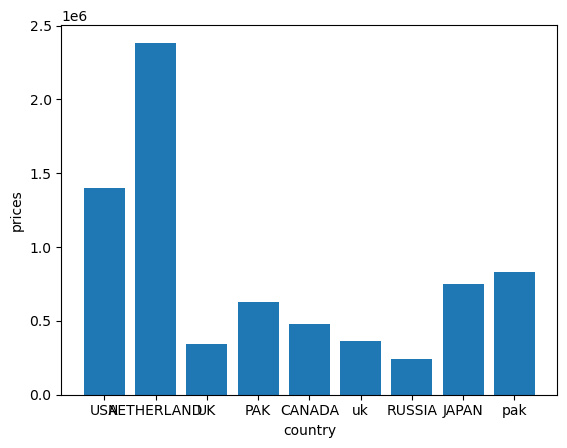

In [151]:
x=df['country']
y=df['price']
plt.xlabel('country')
plt.ylabel('prices')
plt.bar(x,y)
plt.show()

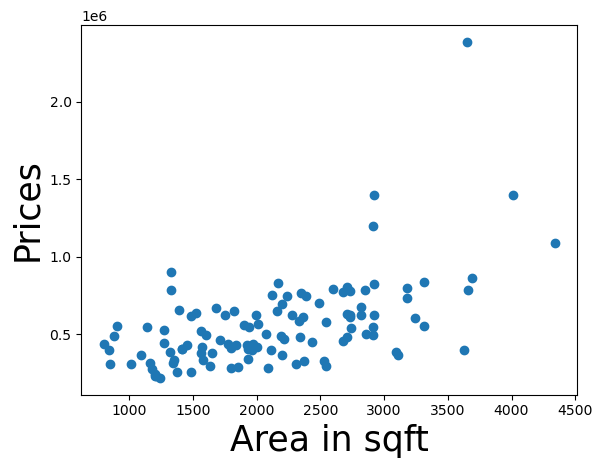

In [152]:
x=df['sqft_living']
y=df['price']
plt.xlabel('Area in sqft',size=25)
plt.ylabel('Prices',size=25)
plt.settiltle=('prices according to area')
plt.scatter(x,y)
      
plt.show()

In [153]:
y=df.iloc[:,1:2]
encoder=sp.LabelEncoder()
y1=encoder.fit_transform(y).reshape(-1,1)
y1=pd.DataFrame(y1,columns=['country'])
y1


C:\Users\butym\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,country
0,15
1,101
2,20
3,34
4,57
...,...
107,97
108,27
109,0
110,75


In [178]:
x=df.iloc[:,0:1]
x1=encoder.fit_transform(x).reshape(-1,1)
x1=pd.DataFrame(x1,columns=['city'])
x1

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,city
0,0
1,0
2,0
3,0
4,0
...,...
107,3
108,3
109,3
110,3


In [170]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1)

In [168]:
from sklearn.metrics import confusion_matrix

In [179]:
model=lm.LogisticRegression()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
conf_mx=confusion_matrix(test_y,pred_y)
conf_mx

C:\Users\butym\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,